## Applying an AdaBoost Model to classify and predict banking crisis.
## A banking crisis is a situation when a country's banking sector is under considerable durress. This is typically measured by the share of poor quality loans, called non-performing loans, exceeding 10 percent of all loans given out by banks.
## Banking crisis imposes significant economic and social costs for any nation. 

In [35]:
# Install the following packages

from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr
import seaborn as sns  

%matplotlib inline

## Import the dataset.

In [5]:
data = pd.read_csv('BankingCrisis.csv')
data.head()
data = data.dropna()
print(data.shape)
print(list(data.columns))

(200, 4)
['BankingCrisisdummy', 'Population', 'GDP', 'ForeignBanks']


In [6]:
data.head()

,BankingCrisisdummy,Population,GDP,ForeignBanks
0,0,10634385,1.712182e+11,14.0
1,0,10709173,1.761187e+11,14.0
2,0,10776504,1.840162e+11,7.0
3,1,10834880,1.911835e+11,7.0
4,1,10882580,1.970578e+11,8.0


## Display the data and types of each column

In [7]:
data.dtypes

BankingCrisisdummy      int64
Population              int64
GDP                   float64
ForeignBanks          float64
dtype: object

## Show descriptive statistics

In [8]:
data.describe()   

,BankingCrisisdummy,Population,GDP,ForeignBanks
count,200.000000,2.000000e+02,2.000000e+02,200.000000
mean,0.140000,2.617910e+07,6.514968e+11,20.695250
std,0.347858,2.587160e+07,9.574462e+11,19.698149
min,0.000000,2.689160e+05,7.894197e+09,0.000000
25%,0.000000,5.754750e+06,4.002463e+10,6.000000
50%,0.000000,1.112558e+07,1.814288e+11,14.000000
75%,0.000000,4.113480e+07,9.893152e+11,30.000000
max,1.000000,8.253418e+07,3.175998e+12,82.000000


## Show counts of Banking crisis and no crisis episodes

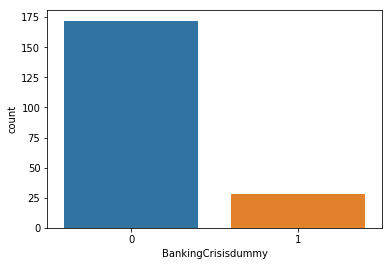

In [11]:
sns.countplot(x = 'BankingCrisisdummy', data = data)  

## Next we create a numpy array of the features and label.

In [12]:
Features = np.array(data[['Population', 'GDP', 'ForeignBanks']])
Labels =  np.array(data[['BankingCrisisdummy']])  

In [13]:
# Split the dataset into test and training set
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 160)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [14]:
scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

## Define and fit an AdaBoost tree model.

In [15]:
# Fit the model with 100 estimators (trees) using the AdaBoostClassifer function from the Scikit Learn ensemble package.

nr.seed(1115)
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

## Next we score the test data subset.
## The test features are scaled using the scaler computed for the training features. Then the predict method is used to compute the scores from the scaled features. 

In [16]:
X_test = scale.transform(X_test)
scores = ab_clf.predict(X_test)

In [21]:
def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                  Score No Crisis   Score Crisis    ')
    print('Actual No Crisis      %6d' % conf[0,0] + '            %5d' % conf[0,1]   )            
    print('Actual Crisis         %6d' % conf[1,0] + '            %5d' % conf[1,1]   )
        ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('          No Crisis  Crisis  ')
    print('Num case    %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1]         )
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1]        )
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1]        )
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1]        ) 
    
print_metrics_3(y_test, scores)

                 Confusion matrix
                  Score No Crisis   Score Crisis    
Actual No Crisis         133                6
Actual Crisis              5               16

Accuracy        0.93
 
          No Crisis  Crisis  
Num case    139.00     21.00
Precision   0.96      0.73
Recall      0.96      0.76
F1          0.96      0.74


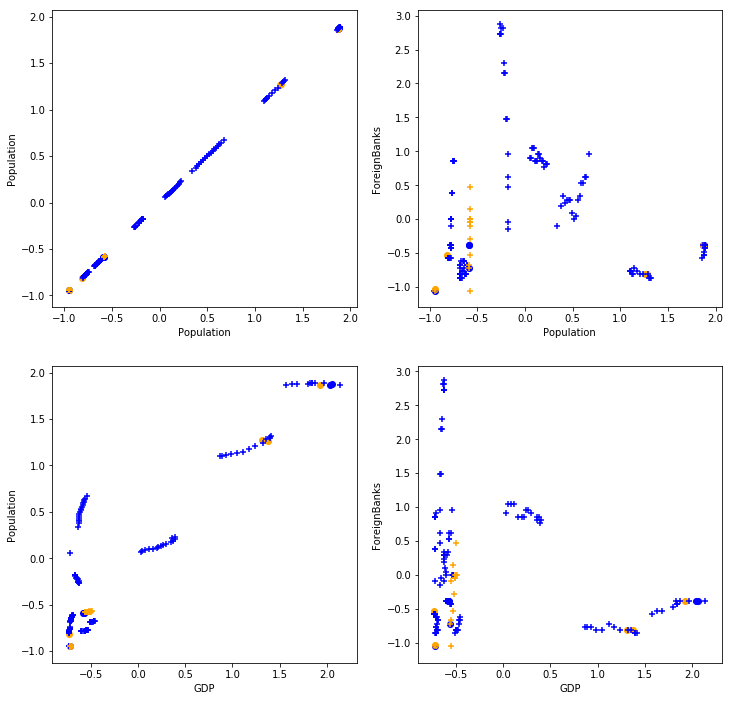

In [26]:
# Displays a set of plots showing correctly (as '+') and incorrectly (as 'o') cases

def plot_data_score(data, y_test, scores):
    '''Function to plot data data by type'''
    ## Find correctly and incorrectly classified cases
    true = np.equal(scores, y_test).astype(int)
    
    ## Create data frame from the test data
    data = pd.DataFrame(data)
    levels = {0:'No Crisis', 1:'Crisis'}
    data['BankingCrisisdummy'] = [levels[x] for x in y_test]
    data.columns = ['Population', 'GDP', 'ForeignBanks', 'BankingCrisisdummy']
    
    ## Set up for the plot
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    markers = ['o', '+']
    x_ax = ['Population', 'GDP']
    y_ax = ['Population', 'ForeignBanks']
    
    for t in range(2): # loop over correct and incorect classifications
        NoCrisis = data[(data['BankingCrisisdummy'] == 'No Crisis') & (true == t)]
        Crisis = data[(data['BankingCrisisdummy'] == 'Crisis') & (true == t)]
        
        # loop over all the dimensions
        for i in range(2):
            for j in range(2):
                ax[i,j].scatter(NoCrisis[x_ax[i]], NoCrisis[y_ax[j]], marker = markers[t], color = 'blue')
                ax[i,j].scatter(Crisis[x_ax[i]], Crisis[y_ax[j]], marker = markers[t], color = 'orange')
                ax[i,j].set_xlabel(x_ax[i])
                ax[i,j].set_ylabel(y_ax[j])

plot_data_score(X_test, y_test, scores)

## Now we will check for feature importance and then display its plot

Text(0, 0.5, 'Feature importance')

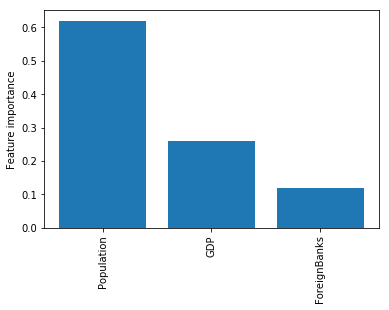

In [27]:
# Display a plot of the feature importance

importance = ab_clf.feature_importances_
plt.bar(range(3), importance, tick_label = ['Population', 'GDP', 'ForeignBanks'])
plt.xticks(rotation=90)
plt.ylabel('Feature importance')

## Next we create a model with a reduced feature set by dropping the share of foreign banks and compare the results. 

In [29]:
# As a first step, e create training and test datasets using the reduced features.

## Create reduced feature set
Features = np.array(data[['Population', 'GDP']])

## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 160)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

## Next we define this model with reduced features, fit the model, score the model and print the results. 

In [30]:
nr.seed(1115)
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)
scores = ab_clf.predict(X_test)
print_metrics_3(y_test, scores)

                 Confusion matrix
                  Score No Crisis   Score Crisis    
Actual No Crisis         132                7
Actual Crisis              5               16

Accuracy        0.93
 
          No Crisis  Crisis  
Num case    139.00     21.00
Precision   0.96      0.70
Recall      0.95      0.76
F1          0.96      0.73


## Dropping one feature does not improve the model.